In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Nt = 4
dt = 0.001
T = int(Nt / dt)
N = 200

n = np.random.binomial(n=1, p=0.01, size=T)

In [4]:
# traditional synaptic currents

I_ext_ampa = np.zeros(T)
s_ext_ampa = np.zeros(T)

I_ampa = np.zeros(T)
s_ampa = np.zeros(T)

I_nmda = np.zeros(T)
s_nmda = np.zeros(T)
x = np.zeros(T)

I_gaba = np.zeros(T)
s_gaba = np.zeros(T)

tau_ampa = 0.002
tau_nmda_rise = 0.002
tau_nmda_decay = 0.100
tau_gaba = 0.005

# these are all vectors
g_ext_ampa = {"E": 2.1, "I": 1.62}
g_ampa = {"E": 0.05, "I": 0.04}
g_nmda = {"E": 0.165, "I": 0.13}
g_gaba = {"E": 1.3, "I": 1.0}

# g_l = {'e': 25, 'i': 20} # E/I leak conductances
# c_m = {'e': 0.5, 'i': 0.2} # E/I membrane capacitances

# g_ext = {'ampa_e': 2.1, 'ampa_i': 1.62} # external input conducatance
# g_rec = {'ampa_e': 0.05, 'nmda_e': 0.165, 'gaba_e': 1.3,
#             'ampa_i': 0.04, 'nmda_i': 0.13, 'gaba_i': 1.0} # recurrent conductances

# tau_recep = {'ampa': 0.002, 'nmda_rise': 0.002, 'nmda_decay': 0.100, 'gaba': 0.005}
    
ve = -60 - 0
vi = -60 - -70
w = 1

cell_type = "E"

for t in range(1,T):
    s_ext_ampa[t] = s_ext_ampa[t-1] + dt*(-s_ext_ampa[t-1] / tau_ampa) + n[t]
    s_ampa[t] = s_ampa[t-1] + dt*(-s_ampa[t-1] / tau_ampa) + n[t]
    x[t] = x[t-1] + dt*((-1 / tau_nmda_rise) * x[t-1]) + n[t]
    s_nmda[t] = s_nmda[t-1] + dt*((-1 / tau_nmda_decay) * s_nmda[t-1] + 500*x[t-1]*(1 - s_nmda[t-1]))
    s_gaba[t] = s_gaba[t-1] + dt*(-s_gaba[t-1] / tau_gaba) + n[t]

    I_ext_ampa[t] = g_ext_ampa[cell_type] * (ve) * s_ext_ampa[t]
    I_ampa[t] = g_ampa[cell_type] * (ve) * (w * s_ampa[t])
    I_nmda[t] = ((g_nmda[cell_type] * (ve)) / (1 + (np.exp(-0.062 * ve) / 3.57))) * (w * s_nmda[t])
    I_gaba[t] = g_gaba[cell_type] * (vi) * s_gaba[t]

I_exc_total = I_ampa + I_nmda

(0.0, 500.0)

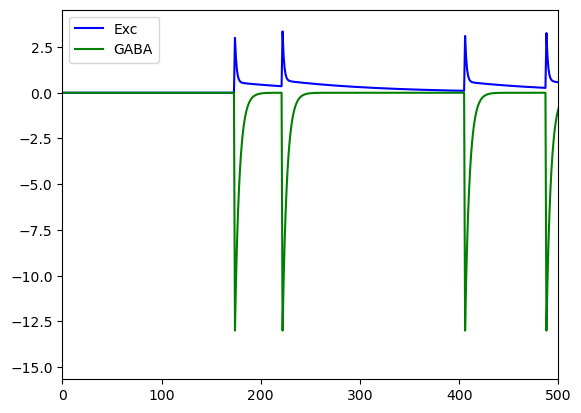

In [5]:
#plt.plot(-I_ampa, color='red', label='AMPA')
#plt.plot(-I_nmda, color='orange', label='NMDA')
plt.plot(-I_exc_total, color='blue', label='Exc')
plt.plot(-I_gaba, color='green', label='GABA')
plt.legend()
plt.xlim((0,500))

In [11]:
# simplified synaptic currents
I_ext_ampa2 = np.zeros(T)
I_ampa2 = np.zeros(T)
I_nmda2 = np.zeros(T)
I_gaba2 = np.zeros(T)

s_nmda2 = np.zeros(T)

ext_ampa_sf = 60.0 * g_ext_ampa[cell_type]
ampa_sf = 60.0 * g_ampa[cell_type]
nmda_sf = 4.5 * g_nmda[cell_type]
gaba_sf = 79.0 * g_nmda[cell_type]

for t in range(1,T):
    # I_ext_ampa2[t] = I_ext_ampa2[t-1] + dt*(-I_ext_ampa2[t-1] / tau_ampa) + (ext_ampa_sf * n[t])
    I_ampa2[t] = I_ampa2[t-1] + dt*(-I_ampa2[t-1] / tau_ampa) + (ampa_sf * w * n[t]) 
    # I_nmda2[t] = I_nmda2[t-1] + dt*(-I_nmda2[t-1] / tau_nmda_decay) + ((1 - I_nmda2[t-1]) * nmda_sf * w * n[t]) # arbitrary 0.45
    I_gaba2[t] = I_gaba2[t-1] + dt*(-I_gaba2[t-1] / tau_gaba) + (gaba_sf * n[t])
    
    s_nmda2[t] = s_nmda2[t-1] + dt*(-s_nmda2[t-1]/tau_nmda_decay) + nmda_sf*(1-s_nmda2[t-1])*n[t]
    I_nmda2[t] = nmda_sf * s_nmda2[t]

I_exc_total2 = I_ampa2 + I_nmda2

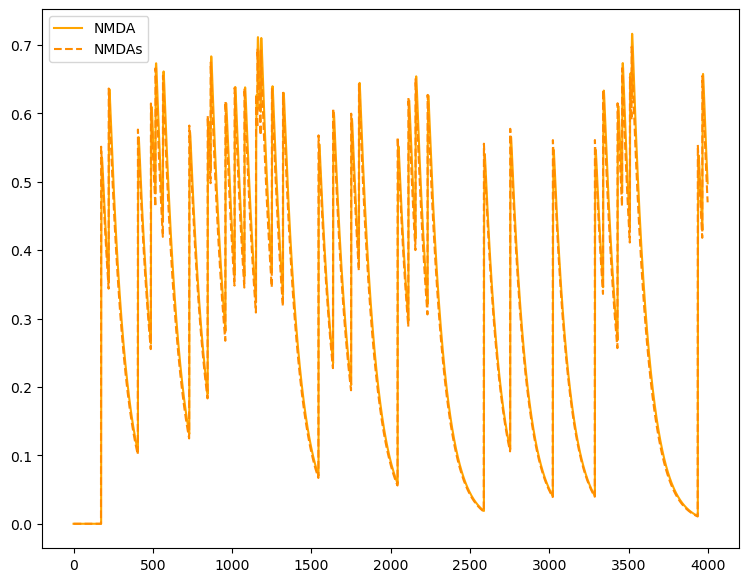

In [7]:
plt.figure(figsize=(9,7))
plt.plot(-I_nmda, color='orange', label='NMDA')
plt.plot(I_nmda2, color='darkorange', label='NMDAs', linestyle='--')
plt.legend()
#plt.xlim((0,2000))

(0.0, 300.0)

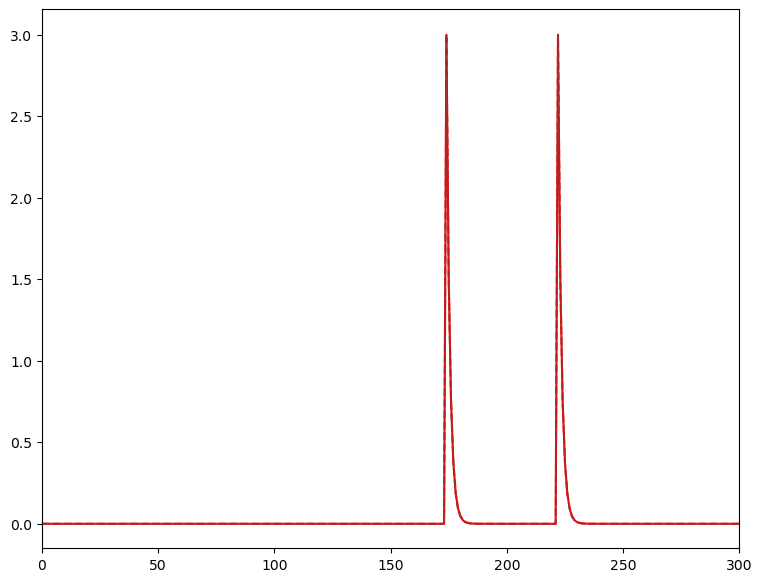

In [10]:
plt.figure(figsize=(9,7))
plt.plot(-I_ampa, color='red', label='AMPA')
plt.plot(I_ampa2, color='brown', label='AMPAs', linestyle='--')
plt.xlim((0,300))

(0.0, 300.0)

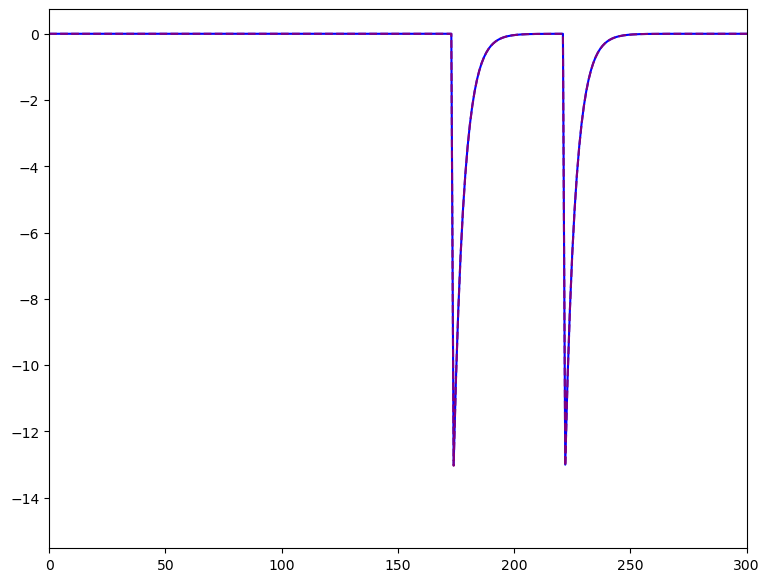

In [12]:
plt.figure(figsize=(9,7))
plt.plot(-I_gaba, color='blue', label='GABA')
plt.plot(-I_gaba2, color='purple', label='GABAs', linestyle='--')
plt.xlim((0,300))